# Classification Exercise - Credit Card Defaults

We will use credit card default data from https://www.kaggle.com/datasets/uciml/default-of-credit-card-clients-dataset


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.options.display.float_format = '{:,.2f}'.format

## Step-1: Download Data

In [2]:
import os
import urllib.request

data_url = 'https://raw.githubusercontent.com/elephantscale/datasets/master/credit-card-default/default.csv'
data_location = os.path.basename(data_url)

if not os.path.exists (data_location):
    print("Downloading : ", data_url)
    urllib.request.urlretrieve(data_url, data_location)
print('data_location:', data_location)

data_location: default.csv


In [3]:
data = pd.read_csv(data_location)
data.sample(10)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
12192,12193,80000,2,2,1,37,1,2,0,0,...,55738,59829,58715,0,2600,2006,5000,0,5000,0
15177,15178,50000,2,1,2,23,0,0,0,0,...,11443,12268,11928,1160,1181,1191,1016,0,1499,0
28216,28217,200000,2,3,2,45,0,0,0,0,...,67480,68843,70266,2049,6104,1839,1862,1918,2149,0
9016,9017,60000,2,2,2,31,2,0,0,0,...,23172,22661,24087,1700,1400,1800,0,1800,0,0
9255,9256,110000,2,1,2,28,1,-1,-1,-1,...,46952,48455,47324,500,400,46952,3000,3000,2000,1
4481,4482,500000,1,1,2,39,-1,-1,-1,-1,...,92715,6655,3966,472,113935,108041,33,3984,2122,0
24619,24620,150000,1,3,1,47,0,0,0,-1,...,3218,0,0,5772,2424,3218,0,0,0,0
2264,2265,350000,2,1,2,27,0,0,0,0,...,250304,251436,249891,14599,10334,5728,8242,13138,4520,0
10192,10193,210000,2,2,1,38,-1,-1,-1,-1,...,614,307,307,307,307,307,614,307,307,0
25447,25448,240000,2,1,2,27,0,0,-2,-2,...,0,0,0,0,0,0,0,0,0,0


## Step-2: EDA

In [4]:
#data.describe()
data.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,"30,000.00","15,000.50","8,660.40",1.00,"7,500.75","15,000.50","22,500.25","30,000.00"
LIMIT_BAL,"30,000.00","167,484.32","129,747.66","10,000.00","50,000.00","140,000.00","240,000.00","1,000,000.00"
SEX,"30,000.00",1.60,0.49,1.00,1.00,2.00,2.00,2.00
EDUCATION,"30,000.00",1.85,0.79,0.00,1.00,2.00,2.00,6.00
MARRIAGE,"30,000.00",1.55,0.52,0.00,1.00,2.00,2.00,3.00
AGE,"30,000.00",35.49,9.22,21.00,28.00,34.00,41.00,79.00
PAY_0,"30,000.00",-0.02,1.12,-2.00,-1.00,0.00,0.00,8.00
PAY_2,"30,000.00",-0.13,1.20,-2.00,-1.00,0.00,0.00,8.00
PAY_3,"30,000.00",-0.17,1.20,-2.00,-1.00,0.00,0.00,8.00
PAY_4,"30,000.00",-0.22,1.17,-2.00,-1.00,0.00,0.00,8.00


In [5]:
data.describe(percentiles=[0.05, 0.10, 0.25, 0.50, 0.75, 0.90, 0.95])

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
count,"30,000.00","30,000.00","30,000.00","30,000.00","30,000.00","30,000.00","30,000.00","30,000.00","30,000.00","30,000.00",...,"30,000.00","30,000.00","30,000.00","30,000.00","30,000.00","30,000.00","30,000.00","30,000.00","30,000.00","30,000.00"
mean,"15,000.50","167,484.32",1.60,1.85,1.55,35.49,-0.02,-0.13,-0.17,-0.22,...,"43,262.95","40,311.40","38,871.76","5,663.58","5,921.16","5,225.68","4,826.08","4,799.39","5,215.50",0.22
std,"8,660.40","129,747.66",0.49,0.79,0.52,9.22,1.12,1.20,1.20,1.17,...,"64,332.86","60,797.16","59,554.11","16,563.28","23,040.87","17,606.96","15,666.16","15,278.31","17,777.47",0.42
min,1.00,"10,000.00",1.00,0.00,0.00,21.00,-2.00,-2.00,-2.00,-2.00,...,"-170,000.00","-81,334.00","-339,603.00",0.00,0.00,0.00,0.00,0.00,0.00,0.00
5%,"1,500.95","20,000.00",1.00,1.00,1.00,23.00,-2.00,-2.00,-2.00,-2.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
10%,"3,000.90","30,000.00",1.00,1.00,1.00,25.00,-1.00,-2.00,-2.00,-2.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,"7,500.75","50,000.00",1.00,1.00,1.00,28.00,-1.00,-1.00,-1.00,-1.00,...,"2,326.75","1,763.00","1,256.00","1,000.00",833.00,390.00,296.00,252.50,117.75,0.00
50%,"15,000.50","140,000.00",2.00,2.00,2.00,34.00,0.00,0.00,0.00,0.00,...,"19,052.00","18,104.50","17,071.00","2,100.00","2,009.00","1,800.00","1,500.00","1,500.00","1,500.00",0.00
75%,"22,500.25","240,000.00",2.00,2.00,2.00,41.00,0.00,0.00,0.00,0.00,...,"54,506.00","50,190.50","49,198.25","5,006.00","5,000.00","4,505.00","4,013.25","4,031.50","4,000.00",0.00
90%,"27,000.10","360,000.00",2.00,3.00,2.00,49.00,2.00,2.00,2.00,2.00,...,"122,418.70","115,883.00","112,110.40","10,300.00","10,401.10","10,000.00","9,570.60","9,500.00","9,600.00",1.00


In [6]:
## Check data skew
data['default'].value_counts()


0    23364
1     6636
Name: default, dtype: int64

In [7]:
data['default'].value_counts(normalize=True)

0   0.78
1   0.22
Name: default, dtype: float64

In [8]:
## correlation matrix

data.corr()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
ID,1.00,0.03,0.02,0.04,-0.03,0.02,-0.03,-0.01,-0.02,-0.00,...,0.04,0.02,0.02,0.01,0.01,0.04,0.01,0.00,0.00,-0.01
LIMIT_BAL,0.03,1.00,0.02,-0.22,-0.11,0.14,-0.27,-0.30,-0.29,-0.27,...,0.29,0.30,0.29,0.20,0.18,0.21,0.20,0.22,0.22,-0.15
SEX,0.02,0.02,1.00,0.01,-0.03,-0.09,-0.06,-0.07,-0.07,-0.06,...,-0.02,-0.02,-0.02,-0.00,-0.00,-0.01,-0.00,-0.00,-0.00,-0.04
EDUCATION,0.04,-0.22,0.01,1.00,-0.14,0.18,0.11,0.12,0.11,0.11,...,-0.00,-0.01,-0.01,-0.04,-0.03,-0.04,-0.04,-0.04,-0.04,0.03
MARRIAGE,-0.03,-0.11,-0.03,-0.14,1.00,-0.41,0.02,0.02,0.03,0.03,...,-0.02,-0.03,-0.02,-0.01,-0.01,-0.00,-0.01,-0.00,-0.01,-0.02
AGE,0.02,0.14,-0.09,0.18,-0.41,1.00,-0.04,-0.05,-0.05,-0.05,...,0.05,0.05,0.05,0.03,0.02,0.03,0.02,0.02,0.02,0.01
PAY_0,-0.03,-0.27,-0.06,0.11,0.02,-0.04,1.00,0.67,0.57,0.54,...,0.18,0.18,0.18,-0.08,-0.07,-0.07,-0.06,-0.06,-0.06,0.32
PAY_2,-0.01,-0.30,-0.07,0.12,0.02,-0.05,0.67,1.00,0.77,0.66,...,0.22,0.22,0.22,-0.08,-0.06,-0.06,-0.05,-0.04,-0.04,0.26
PAY_3,-0.02,-0.29,-0.07,0.11,0.03,-0.05,0.57,0.77,1.00,0.78,...,0.23,0.23,0.22,0.00,-0.07,-0.05,-0.05,-0.04,-0.04,0.24
PAY_4,-0.00,-0.27,-0.06,0.11,0.03,-0.05,0.54,0.66,0.78,1.00,...,0.25,0.24,0.24,-0.01,-0.00,-0.07,-0.04,-0.03,-0.03,0.22


[]

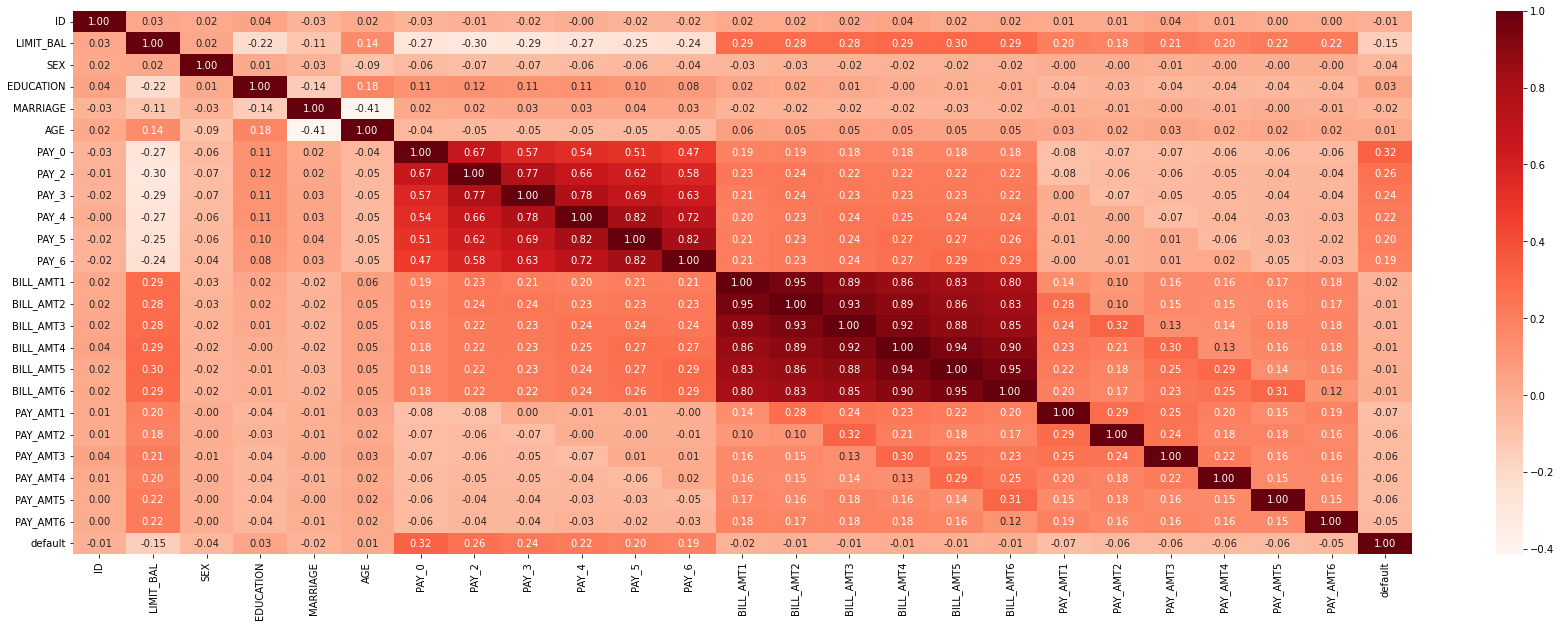

In [9]:
plt.figure(figsize = (30,10))

sns.heatmap(data.corr(), annot=True, fmt='.2f', cmap="Reds").plot()

<AxesSubplot:>

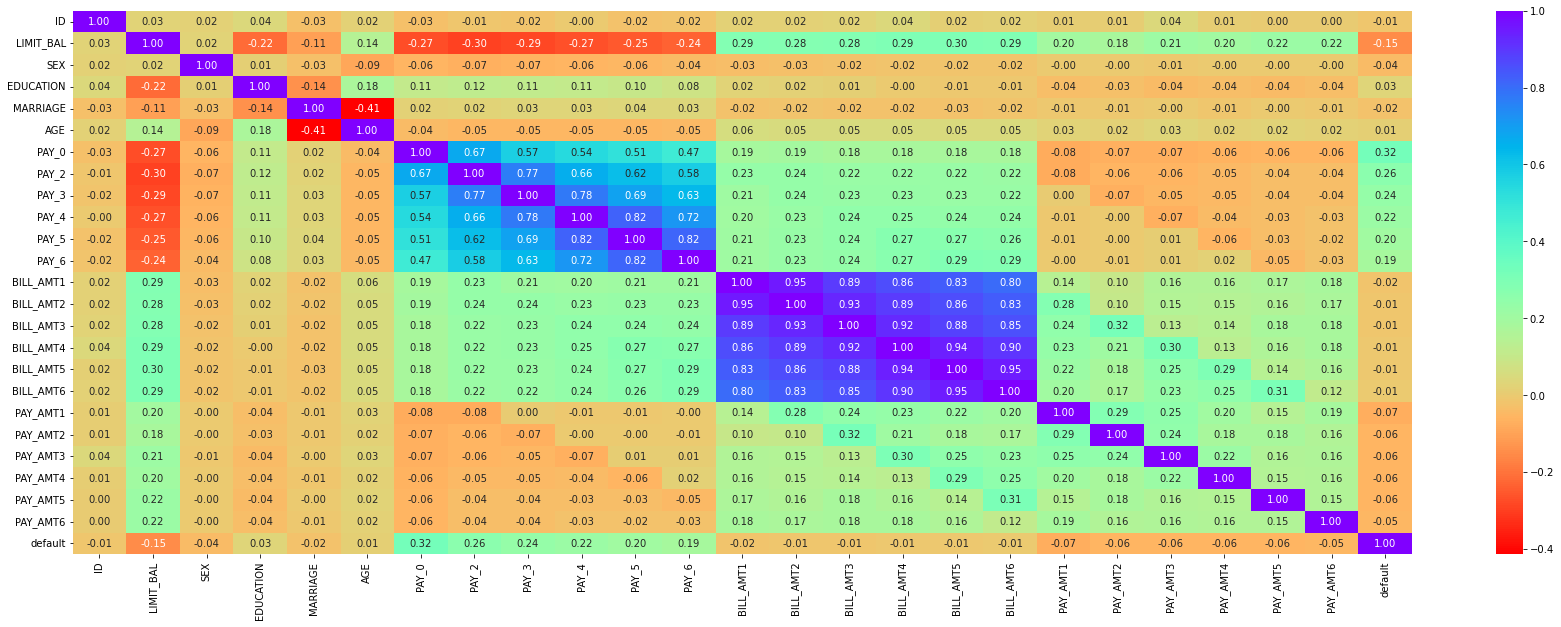

In [10]:
plt.figure(figsize = (30,10))

#sns.set_context("talk", font_scale=0.9) 
sns.heatmap(data.corr(), cmap='rainbow_r', annot=True, fmt='.2f')

## Step-3: Clean up 

TODO

## Step-4: Shape data

In [11]:
label_col = 'default'

feature_columns = data.columns
feature_columns = feature_columns.drop (['ID', 'default'])
#print (feature_columns)

In [12]:
X = data[feature_columns]
y = data[[label_col]]

print (X.shape)
print (y.shape)

(30000, 23)
(30000, 1)


In [13]:
from sklearn.model_selection import train_test_split

## TODO : split data into train / test, with 20% for test
## hint : 20% is 0.2

X_train,X_test,y_train, y_test = train_test_split(X,y,  test_size=0.2, random_state=123)


print ("x_train :" , X_train.shape )
print ("x_test :", X_test.shape)
print ("y_train :", y_train.shape)
print ("y_test :", y_test.shape)

x_train : (24000, 23)
x_test : (6000, 23)
y_train : (24000, 1)
y_test : (6000, 1)


## Step-5: Classification Algo

In [14]:
%%time

import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.ensemble import GradientBoostingClassifier

#algo = LogisticRegression(max_iter=500)
#algo = RandomForestClassifier()
#algo = LinearSVC(max_iter=5000)
algo = GradientBoostingClassifier()

model = algo.fit(X_train, np.ravel(y_train))
print (model)

GradientBoostingClassifier()
CPU times: user 5.22 s, sys: 14 ms, total: 5.23 s
Wall time: 5.28 s


## Step-6 : Evaluate

In [15]:
## TODO : predict on X_test
## hint : 'X_test'

y_pred = model.predict (X_test)
y_pred

array([0, 0, 1, ..., 1, 0, 0])

In [16]:
values, counts = np.unique(y_pred, return_counts=True)
print (values, counts)
pd.DataFrame({'values' : values, 'counts' : counts})

[0 1] [5247  753]


,values,counts
0,0,5247
1,1,753


In [17]:
pd.unique(y_pred)

array([0, 1])

In [18]:
train_accuracy = model.score(X_train,y_train)
print ("Train accuracy: ", train_accuracy)

Train accuracy:  0.8256666666666667


In [19]:
test_accuracy = model.score(X_test, y_test)

print ("Test accuracy: ", test_accuracy)

Test accuracy:  0.8228333333333333


In [20]:
from sklearn.metrics import confusion_matrix
import numpy as np

cm_labels = np.unique(y)
cm_array = confusion_matrix(y_test, y_pred)
#print (cm_array)

cm_df = pd.DataFrame(cm_array, index=cm_labels, columns=cm_labels)
cm_df

,0,1
0,4440,256
1,807,497


[]

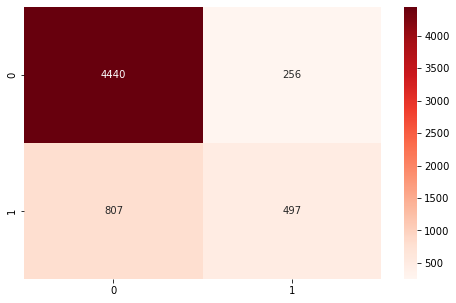

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize = (8,5))

# colormaps : cmap="YlGnBu" , cmap="Greens", cmap="Blues",  cmap="Reds"
sns.heatmap(cm_df, annot=True, cmap="Reds", fmt='d').plot()